# Customer Churn Prediction

## 1. Introduction
In this project, we predict **customer churn** for a telecom company.  
Churn means whether a customer will leave (`Yes`) or stay (`No`).  

**Why does churn matter?**

It provides valuable insights on business impact which can help guide future retention strategies and increase revenue.

**Goals:**
- Explore customer demographics and contracts.
- Train ML models (Logistic Regression, Random Forest, XGBoost).
- Identify key drivers of churn (e.g., contract type, tenure).



In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/juans/OneDrive/Documents/Programming Projects/customer-churn-prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Understanding & Cleaning

Before analyzing the data or building any predictive models, the datas structure must be understood in order to ensure its quality.

This includes:

- Inspecting the dataset shape, data types, and missing values
- Converting categorical columns such as "Yes/No" into numerical 0/1 format
- Handling inconsistent or missing entries

Data cleaning is essential as poor-quality data leads to unreliable insights and weak models. 

After this section, we will have a clean dataset ready exploratory data analysis (EDA).

In [258]:
df.shape

(7043, 21)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [260]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [261]:
binary_cols = []


for col in df.columns:
    uniques = df[col].unique()  
    if set(uniques).issubset({"Yes", "No"}):
        binary_cols.append(col)


df[binary_cols] = df[binary_cols].replace({
    "Yes": 1, 
    "No": 0, 
}).astype('int8')


df.head()
print(binary_cols)


['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


C:\Users\juans\AppData\Local\Temp\ipykernel_28916\2630972453.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


In [262]:
df.info()
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.isna().sum()

df[df["TotalCharges"].isna()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int8   


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,1,1,0,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,0,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,1,1,0,1,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,1,1,0,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,1,1,0,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,1,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,1,1,0,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,1,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,1,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,1,1,0,1,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,NaN,0


As shown above, converting the "TotalCharges" column from the object data type to the integer data type has resulted in 11 new missing values. 

This is becauses some customers have no entry for their TotalCharges as their tenure = 0 meaning that they have not been with the company long enough to generate any bills.

Therefore, it makes logical sense to change their TotalCharges to 0.





In [263]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Exploratory Data Analysis

#### Not Churn vs Churn

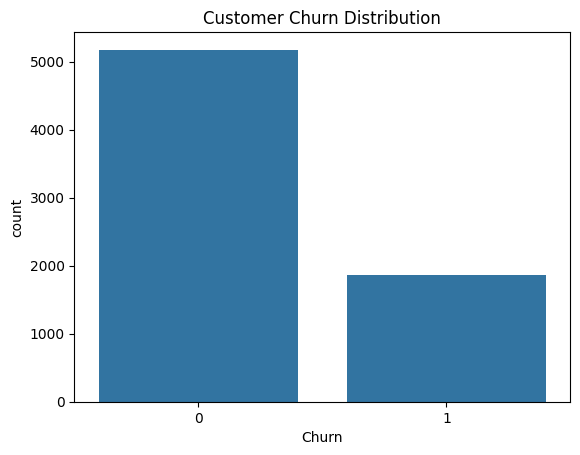

In [264]:
sns.countplot(data=df, x="Churn")
plt.title("Customer Churn Distribution")
plt.show()

In [265]:
total = 7043
not_churn = (df["Churn"] == 0).sum()
churn = (df["Churn"] == 1).sum()

not_churn_percent = (not_churn / total).round(2)
print(not_churn_percent)
churn_percent = (churn / total).round(2)
print(churn_percent)

0.73
0.27


From this chart, we can see that the majority of customers did not churn. 

Specifically that 73% of customers stayed whilst 27% of customers left.

#### Churn vs Contract Type

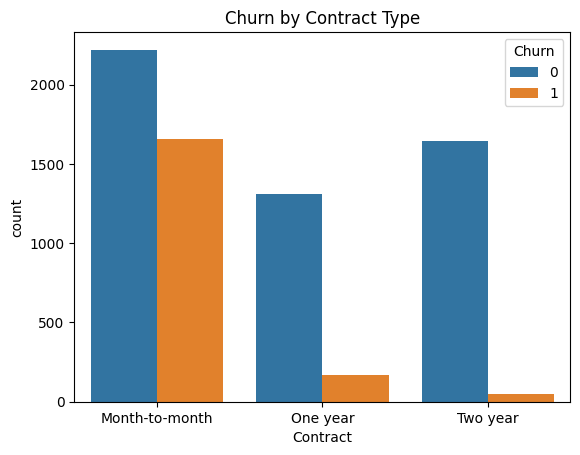

In [266]:
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.show()


The plot above shows an inverse relationship between contract length and churn rate. 

Customers on month-to-month contracts have the highest churn, whilst customers on one-year contracts have much less churn.

#### Tenure vs Churn

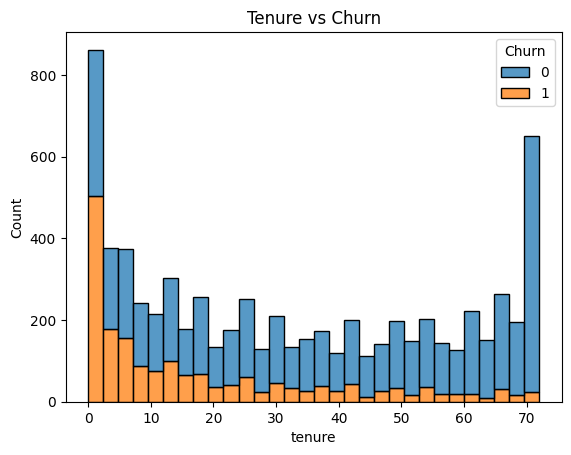

In [267]:
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Tenure vs Churn")
plt.show()

The plot above shows an inverse relationship between length of tenure and amount of churn. 

Customers with longer tenures have less churn.

#### Churn vs Monthly Charghes

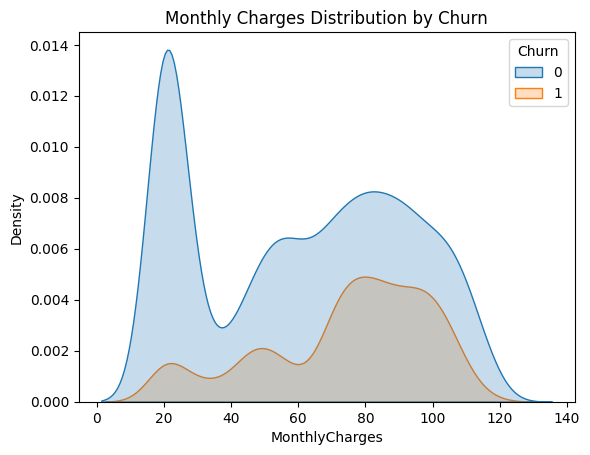

In [268]:
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


The plot above shows a direct relationship between increasing monthly charges and an increased churn rate. 

Customers with low monthly charges (around $20-30) rarely churn, while churn rates increase amongst customers with higher monthly charges ($70-100).

Interestingly, customers with higher monthly charges ($70-90) do not churn, possibly because some customers remain loyal despite the higher costs.


#### Correlation Heatmap

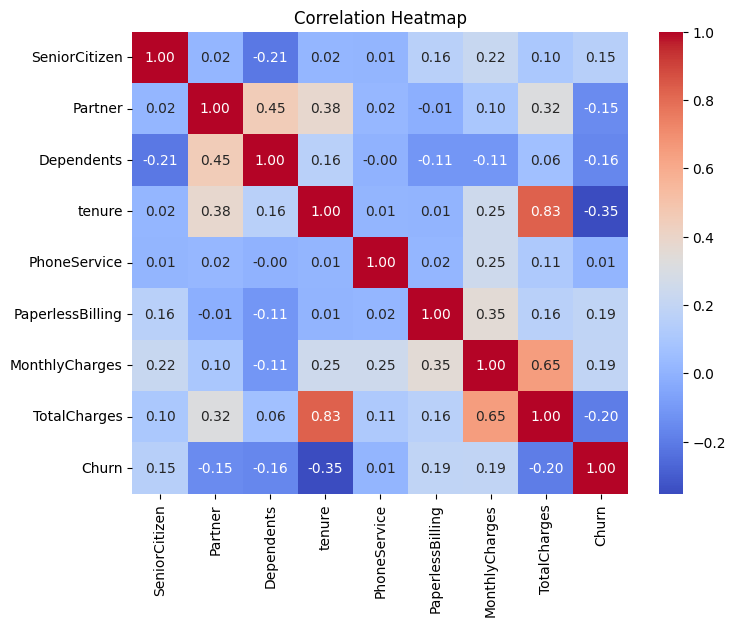

In [270]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)  
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap reveals a strong positive correlation between tenure and TotalCharges, which is expected since customers who stay longer pay more over time. 

There is also a moderate positive correlation between MonthlyCharges and churn, indicating that customers with higher bills are slightly more likely to leave. 

Conversely, tenure shows a negative correlation with churn, suggesting that long-tenure customers are less likely to churn.